In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd

In [3]:
fores_data = pd.read_csv('forestfires.csv')
fores_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
fores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fores_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()

In [7]:
fores_data['month'] = le.fit_transform(fores_data['month'])
fores_data['day'] = le.fit_transform(fores_data['day'])
fores_data['size_category'] = le.fit_transform(fores_data['size_category'])

In [8]:
X= fores_data.drop('size_category',axis=1)
Y=fores_data['size_category']

In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
#Neural Network Model
model = Sequential()
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 7ms/step - loss: 0.6574 - accuracy: 0.6532 - val_loss: 0.6508 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7572 - val_loss: 0.6599 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7601 - val_loss: 0.6356 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7601 - val_loss: 0.5986 - val_accuracy: 0.6959
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7717 - val_loss: 0.6668 - val_accuracy: 0.7018
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7803 - val_loss: 0.5557 - val_accuracy: 0.7251
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8006 - val_loss: 0.5013 - val_accuracy: 0.7544
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9884 - val_loss: 0.0942 - val_accuracy: 0.9415
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0829 - val_accuracy: 0.9591
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9913 - val_loss: 0.0698 - val_accuracy: 0.9766
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9855 - val_loss: 0.1022 - val_accuracy: 0.9415
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9884 - val_loss: 0.0859 - val_accuracy: 0.9766
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.1261 - val_accuracy: 0.9474
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9798 - val_loss: 0.0687 - val_accuracy: 0.9766
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9798 - val_loss: 0.1679 - val_accuracy: 0.9474
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9913 - val_loss: 0.1755 - val_accuracy: 0.9474
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.2031 - val_accuracy: 0.9474
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.0846 - val_accuracy: 0.9708
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0844 - val_accuracy: 0.9708
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9942 - val_loss: 0.1229 - val_accuracy: 0.9591
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9884 - val_loss: 0.1763 - val_accuracy: 0.9474
Epoch 123/150

In [11]:
score = model.evaluate(X,Y)

17/17 [==============================] - 0s 810us/step - loss: 0.0737 - accuracy: 0.9749


In [12]:
model.metrics_names[1], score[1]*100

('accuracy', 97.48549461364746)

In [13]:
h=model.fit(x=X, y=Y, verbose=1,batch_size=50,epochs=500,shuffle='true')

Epoch 1/500
11/11 [==============================] - 0s 997us/step - loss: 0.0638 - accuracy: 0.9807
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9884
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9865
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9884
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9884
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9884
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9884
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9903
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9884
Epoch 1

11/11 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9884
Epoch 83/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9845
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9884
Epoch 85/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9923
Epoch 86/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9884
Epoch 87/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9923
Epoch 88/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9884
Epoch 89/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9923
Epoch 90/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9865
Epoch 91/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9884
Epoch 92/500


11/11 [==============================] - 0s 997us/step - loss: 0.0220 - accuracy: 0.9884
Epoch 163/500
11/11 [==============================] - 0s 997us/step - loss: 0.0201 - accuracy: 0.9923
Epoch 164/500
11/11 [==============================] - 0s 997us/step - loss: 0.0168 - accuracy: 0.9942
Epoch 165/500
11/11 [==============================] - 0s 997us/step - loss: 0.0177 - accuracy: 0.9903
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9923
Epoch 167/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9903
Epoch 168/500
11/11 [==============================] - 0s 997us/step - loss: 0.0154 - accuracy: 0.9942
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9942
Epoch 170/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9865
Epoch 171/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0

11/11 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9884
Epoch 243/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9884
Epoch 244/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9923
Epoch 245/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9942
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9942
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9903
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9923
Epoch 250/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9942
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9961
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 323/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9942
Epoch 324/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9961
Epoch 325/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9961
Epoch 326/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9981
Epoch 327/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 328/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9923
Epoch 329/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9923
Epoch 330/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9981
Epoch 331/500
11/11 [==============================] - 0s 997us/step - loss: 0.0100 - accuracy: 0.9942
Ep

11/11 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9942
Epoch 403/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9923
Epoch 404/500
11/11 [==============================] - 0s 997us/step - loss: 0.0084 - accuracy: 0.9981
Epoch 405/500
11/11 [==============================] - 0s 997us/step - loss: 0.0078 - accuracy: 0.9981
Epoch 406/500
11/11 [==============================] - 0s 997us/step - loss: 0.0212 - accuracy: 0.9865
Epoch 407/500
11/11 [==============================] - 0s 997us/step - loss: 0.0263 - accuracy: 0.9865
Epoch 408/500
11/11 [==============================] - 0s 997us/step - loss: 0.0126 - accuracy: 0.9942
Epoch 409/500
11/11 [==============================] - 0s 953us/step - loss: 0.0081 - accuracy: 0.9981
Epoch 410/500
11/11 [==============================] - 0s 997us/step - loss: 0.0103 - accuracy: 0.9981
Epoch 411/500
11/11 [==============================] - 0s 997us/step - loss: 0.0097 - accur

11/11 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 483/500
11/11 [==============================] - 0s 997us/step - loss: 0.0072 - accuracy: 0.9981
Epoch 484/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9923
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9942
Epoch 486/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9961
Epoch 487/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9923
Epoch 488/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9961
Epoch 489/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9961
Epoch 490/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 491/500
11/11 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Ep

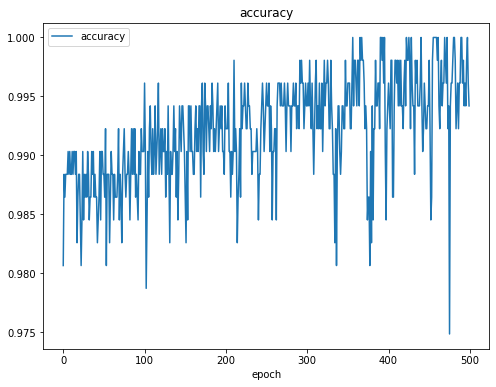

In [14]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy']);

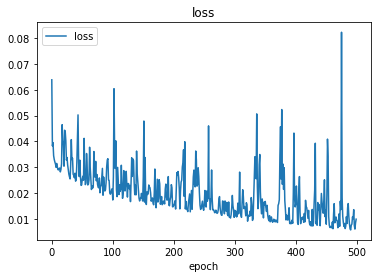

In [15]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);